# Evolution cycle analysis

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
# OPTIONS FOR ANALYSIS
# ('algo' 'corss'/'mut' 'pop'x'gen')
#ref = '2025-06-14_17-53-11' # NSGA-II 80/10 50x50
ref = '2025-06-14_16-36-03' # NSGA-II 80/20 50x50 # higher mut
#ref = '2025-06-14_14-33-43' # NSGA-II 80/10 50x100 # higher gen

algo = 'NSGA-II'
filename = f'{algo}_{ref}'

history_file = f'history/evolution_{filename}'
results_file = f'results/results_{filename}'

In [270]:
df = pd.read_csv(f"{history_file}.csv")
try:
    df_res = pd.read_csv(f"{results_file}.csv")
    Finished = True
except:
    df_res = None
    Finished = False

In [271]:
if Finished: df['best'] = df['fitness'].isin(df_res['fitness'])

In [272]:
df.head()

params   file_size  peaq_score  \
0  {'ar': '8000', 'sample_fmt': 's16p', 'compress...   90.781250      -3.858   
1  {'ar': '8000', 'sample_fmt': 's32p', 'compress...   73.343750      -3.858   
2  {'ar': '11025', 'sample_fmt': 'fltp', 'compres...   51.110352      -3.834   
3  {'ar': '48000', 'sample_fmt': 'fltp', 'compres...  312.453125      -3.525   
4  {'ar': '22050', 'sample_fmt': 's16p', 'compres...   74.423828      -3.724   

   distortion_index  processing_time   fitness   best  
0            -3.514         0.787583 -1.385328  False  
1            -3.505         0.461964 -1.330597  False  
2            -3.322         0.404637 -1.177236  False  
3            -2.107         0.662958 -0.510112  False  
4            -2.735         0.491899 -0.779419  False

In [273]:
if Finished: df_res.head()

In [274]:
# Define your weights
# weights = {
#     'file_size': -0.5,
#     'peaq_score': 1,
#     'distortion_index': 0.3,
#     'processing_time': -0.05
#}

In [275]:
# Calculate the weighted fitness for each row
# df['fitness'] = (
#     df['file_size'] * weights['file_size'] +
#     df['peaq_score'] * weights['peaq_score'] +
#     df['distortion_index'] * weights['distortion_index'] +
#     df['processing_time'] * weights['processing_time']
# )

In [276]:
df.head()

params   file_size  peaq_score  \
0  {'ar': '8000', 'sample_fmt': 's16p', 'compress...   90.781250      -3.858   
1  {'ar': '8000', 'sample_fmt': 's32p', 'compress...   73.343750      -3.858   
2  {'ar': '11025', 'sample_fmt': 'fltp', 'compres...   51.110352      -3.834   
3  {'ar': '48000', 'sample_fmt': 'fltp', 'compres...  312.453125      -3.525   
4  {'ar': '22050', 'sample_fmt': 's16p', 'compres...   74.423828      -3.724   

   distortion_index  processing_time   fitness   best  
0            -3.514         0.787583 -1.385328  False  
1            -3.505         0.461964 -1.330597  False  
2            -3.322         0.404637 -1.177236  False  
3            -2.107         0.662958 -0.510112  False  
4            -2.735         0.491899 -0.779419  False

In [277]:
df.describe()

file_size   peaq_score  distortion_index  processing_time  \
count  2550.000000  2550.000000       2550.000000      2550.000000   
mean    175.144537    -3.198527         -1.697263         0.572418   
std     114.848451     0.441601          0.879178         0.147057   
min      35.867188    -3.859000         -3.514000         0.337816   
25%      71.023438    -3.676000         -2.552000         0.472909   
50%     167.059082    -3.235000         -1.534000         0.538159   
75%     247.643555    -2.719000         -0.846000         0.633198   
max     447.265625    -2.582000         -0.695000         1.760046   

           fitness  
count  2550.000000  
mean      0.605595  
std       1.165948  
min      -1.389657  
25%      -0.716731  
50%       0.575961  
75%       1.898637  
max       2.133851

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   params            2550 non-null   object 
 1   file_size         2550 non-null   float64
 2   peaq_score        2550 non-null   float64
 3   distortion_index  2550 non-null   float64
 4   processing_time   2550 non-null   float64
 5   fitness           2550 non-null   float64
 6   best              2550 non-null   bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 122.1+ KB


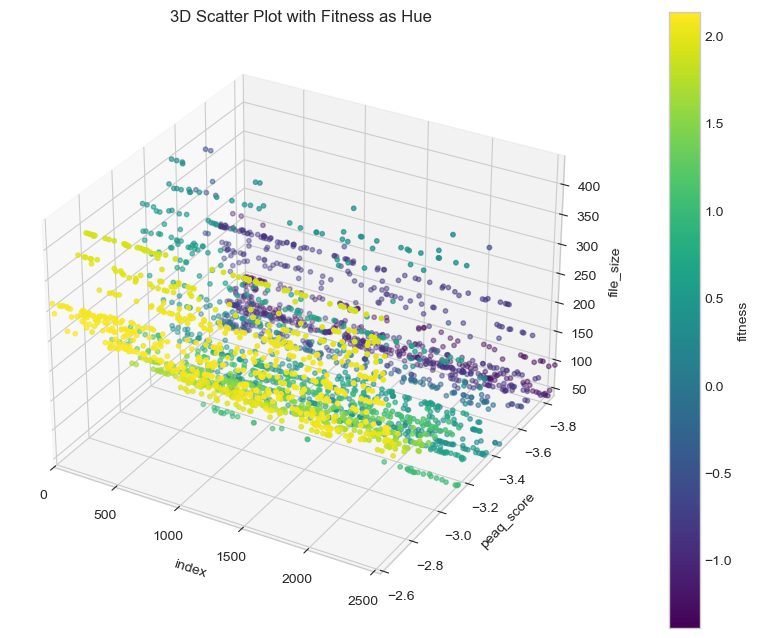

In [279]:
num_points = len(df)

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with 'fitness' determining the color
# 'c' parameter is used to map numerical values to colors, and 'cmap' specifies the colormap
scatter = ax.scatter(
    df.index,         # X-axis
    df['peaq_score'], # Y-axis
    df['file_size'],  # Z-axis (using dfFrame index as requested)
    c=df['fitness'],  # Color based on 'fitness' values
    cmap='viridis',   # Colormap (you can try others like 'plasma', 'magma', 'cividis')
    s=10              # Size of the scatter points
)

# Set labels for each axis
ax.set_xlabel('index')
ax.set_ylabel('peaq_score')
ax.set_zlabel('file_size')

# Set the limits for each axis
ax.set_xlim(0, num_points) # Z-axis limit set to the number of df points
ax.set_ylim(df['peaq_score'].max(), df['peaq_score'].min())
ax.set_zlim(df['file_size'].min(), df['file_size'].max())

# Set the title of the plot
ax.set_title('3D Scatter Plot with Fitness as Hue')

# Add a color bar to explain the 'fitness' color mapping
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('fitness')

# Display the plot
plt.show()

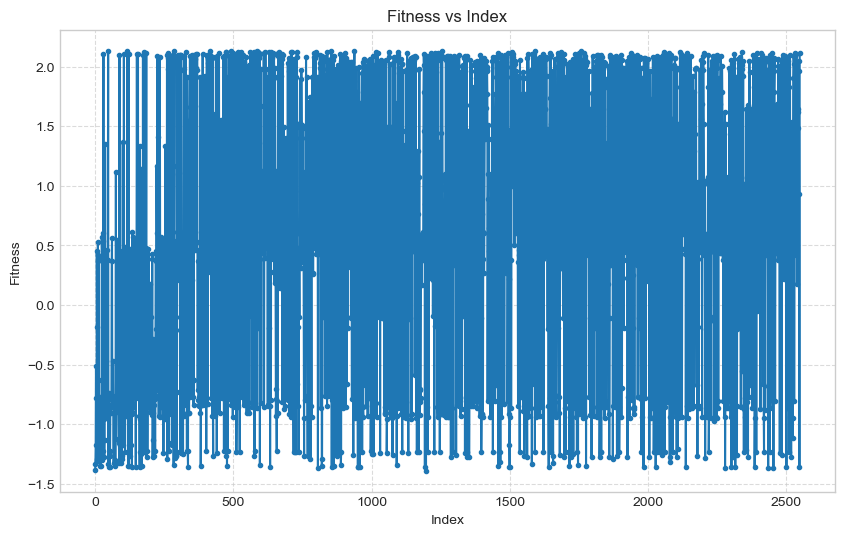

In [280]:
data = df.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(data['index'], data['fitness'], marker='o', linestyle='-', markersize=3)
plt.xlabel('Index')
plt.ylabel('Fitness')
plt.title('Fitness vs Index')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [281]:
total_individuals = len(df)
total_individuals

2550

In [282]:
portion = 0.5
num_sample = int(total_individuals * portion)
num_sample

1275

In [283]:
data_full = df
data_full = data_full.reset_index()
data = data_full.sample(num_sample)

In [284]:
data = data.sort_values(by='index')

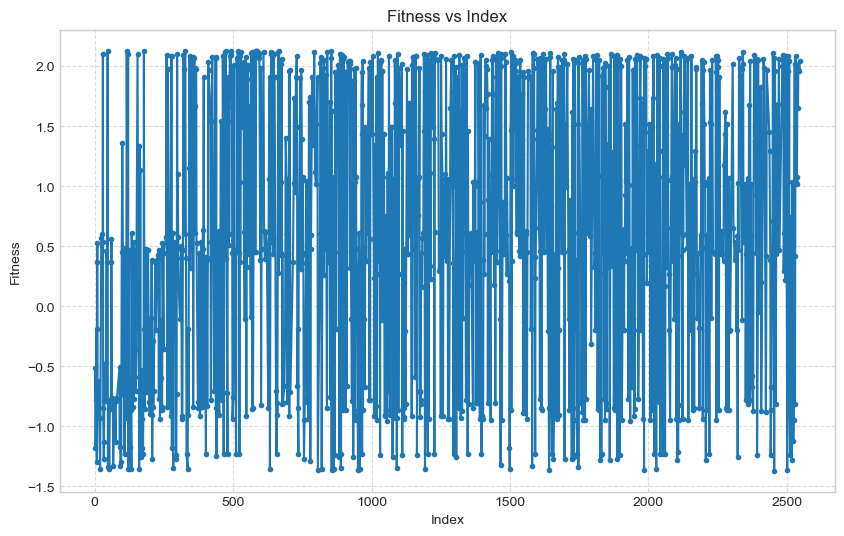

In [285]:
plt.figure(figsize=(10, 6))
plt.plot(data['index'], data['fitness'], marker='o', linestyle='-', markersize=3)
plt.xlabel('Index')
plt.ylabel('Fitness')
plt.title('Fitness vs Index')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [286]:
convergence_target = 2

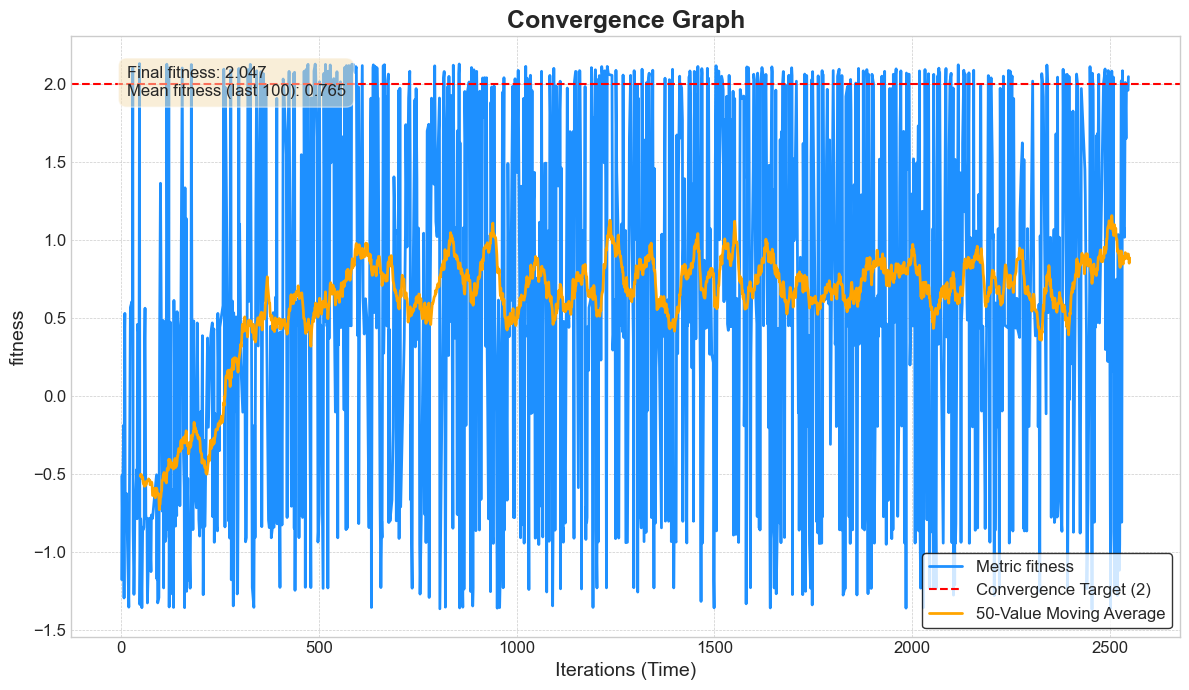

In [287]:
# --- Create the Convergence Graph ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the convergence data
ax.plot(data['index'], data['fitness'], label='Metric fitness', color='dodgerblue', linewidth=2)

# Add a horizontal line for the convergence target
ax.axhline(y=convergence_target, color='r', linestyle='--', label=f'Convergence Target ({convergence_target})')

# Calculate the 50-value moving average
data_full['moving_average_50'] = data_full['fitness'].rolling(window=50).mean()

# Plot the 50-value moving average
ax.plot(data_full['index'], data_full['moving_average_50'], label='50-Value Moving Average', color='orange', linewidth=2)

# Customize the plot
ax.set_title('Convergence Graph', fontsize=18, fontweight='bold')
ax.set_xlabel('Iterations (Time)', fontsize=14)
ax.set_ylabel('fitness', fontsize=14)
ax.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black') 
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a text box with some stats
stats_text = (f"Final fitness: {data['fitness'].iloc[-1]:.3f}\n"
            f"Mean fitness (last 100): {data['fitness'].tail(100).mean():.3f}")
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


# Show the plot
plt.tight_layout()
plt.show()


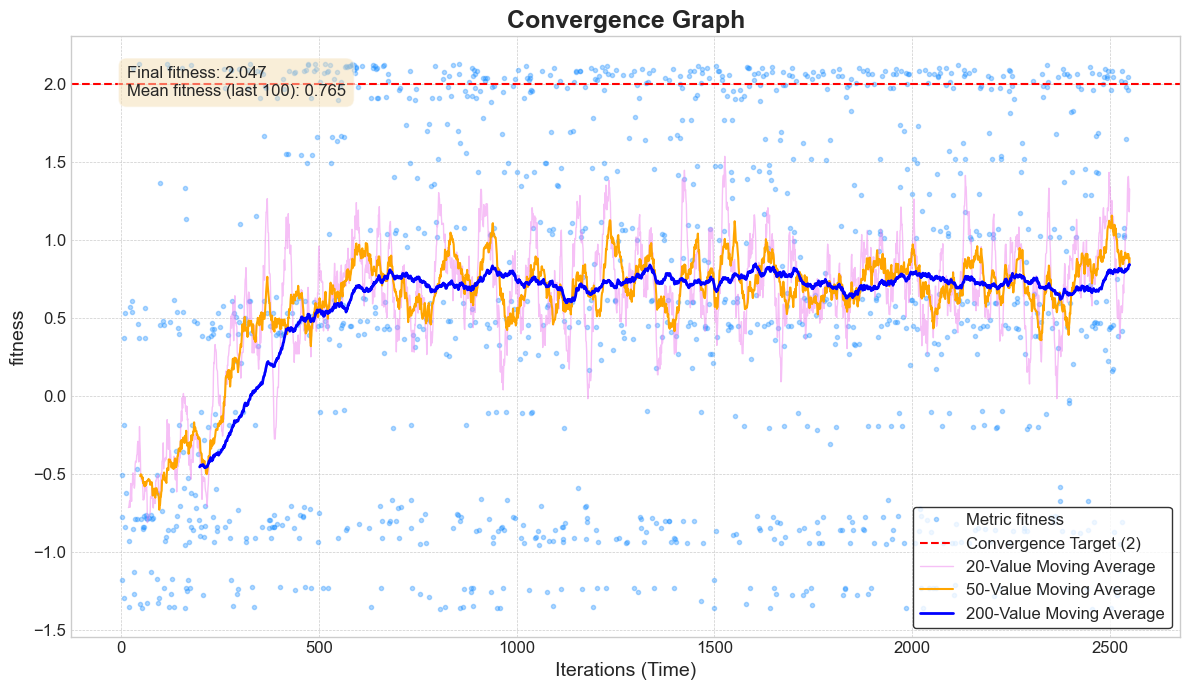

In [288]:
# --- Create the Convergence Graph ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the convergence data
ax.plot(data['index'], data['fitness'], label='Metric fitness', color='dodgerblue', marker='.', linestyle='', linewidth=0, alpha=0.35)

# Add a horizontal line for the convergence target
ax.axhline(y=convergence_target, color='r', linestyle='--', label=f'Convergence Target ({convergence_target})')

# Calculate the 10-value moving average
data_full['moving_average_20'] = data_full['fitness'].rolling(window=20).mean()
# Calculate the 50-value moving average
data_full['moving_average_50'] = data_full['fitness'].rolling(window=50).mean()
# Calculate the 100-value moving average
data_full['moving_average_200'] = data_full['fitness'].rolling(window=200).mean()

# Plot moving averages
ax.plot(data_full['index'], data_full['moving_average_20'], label='20-Value Moving Average', color='violet', linewidth=1, alpha=0.5)
ax.plot(data_full['index'], data_full['moving_average_50'], label='50-Value Moving Average', color='orange', linewidth=1.5)
ax.plot(data_full['index'], data_full['moving_average_200'], label='200-Value Moving Average', color='blue', linewidth=2)

# Customize the plot
ax.set_title('Convergence Graph', fontsize=18, fontweight='bold')
ax.set_xlabel('Iterations (Time)', fontsize=14)
ax.set_ylabel('fitness', fontsize=14)
ax.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black') 
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a text box with some stats
stats_text = (f"Final fitness: {data['fitness'].iloc[-1]:.3f}\n"
            f"Mean fitness (last 100): {data['fitness'].tail(100).mean():.3f}")
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


# Show the plot
plt.tight_layout()
plt.show()


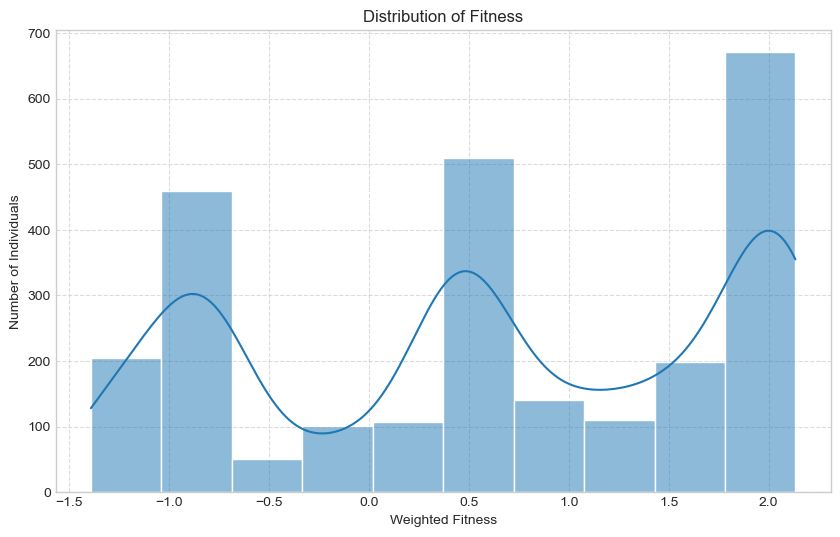

In [289]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fitness'], kde=True, bins=10)
plt.title('Distribution of Fitness')
plt.xlabel('Weighted Fitness')
plt.ylabel('Number of Individuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

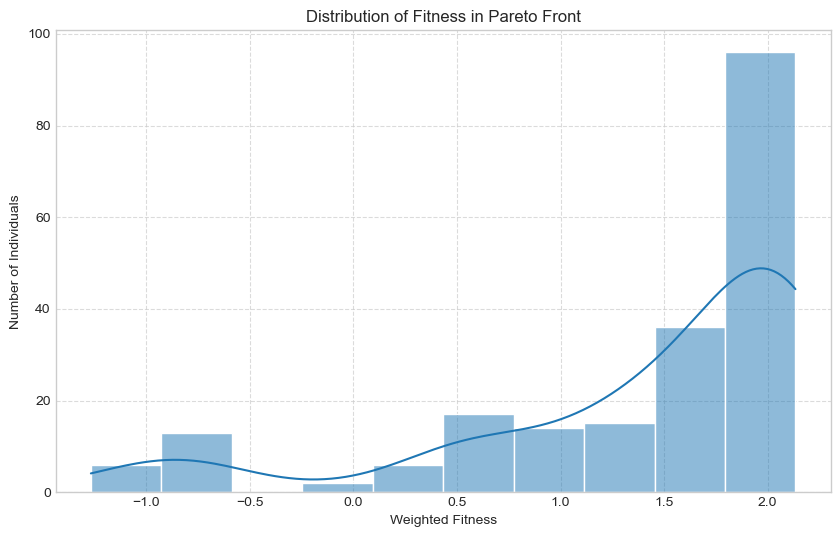

In [290]:
if Finished: 
    plt.figure(figsize=(10, 6))
    sns.histplot(df_res['fitness'], kde=True, bins=10)
    plt.title('Distribution of Fitness in Pareto Front')
    plt.xlabel('Weighted Fitness')
    plt.ylabel('Number of Individuals')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# History

peaq_score


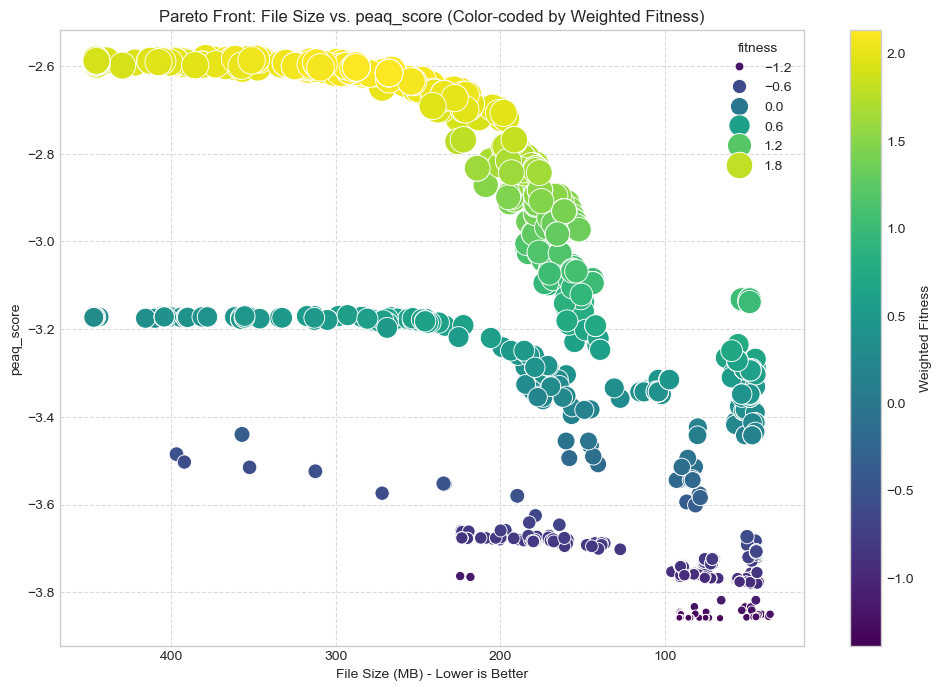

distortion_index


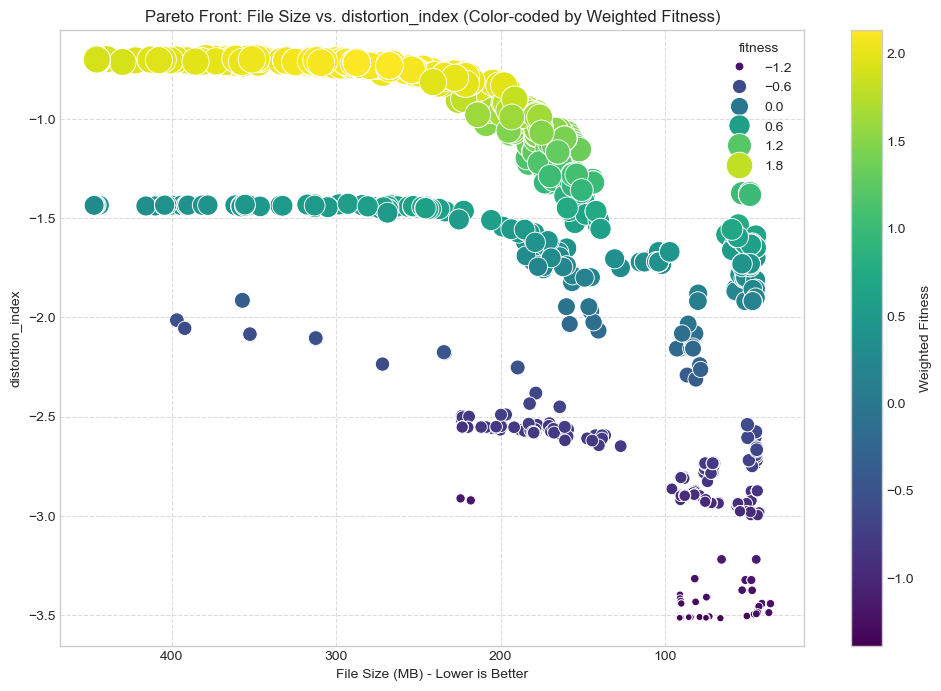

processing_time


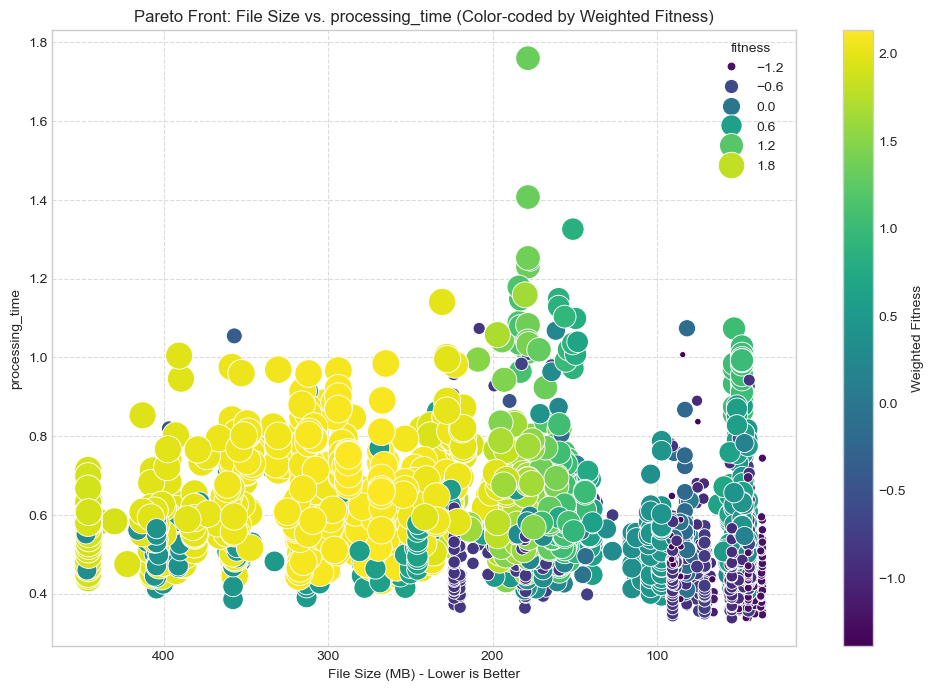

In [291]:
data = df
data = data.reset_index()

for feature in ['peaq_score','distortion_index','processing_time']:
    print(feature)
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=data,
        x='file_size', 
        y=feature,
        hue='fitness', # Color points by weighted fitness
        size='fitness', # Size points by weighted fitness (optional, can be removed)
        sizes=(20, 400), # Adjust size range
        palette='viridis', # Choose a colormap
        #legend='full'
    )

    # Reverse x-axis if minimizing file_size makes lower values better
    plt.gca().invert_xaxis() # Assuming lower file_size is better

    plt.title(f'Pareto Front: File Size vs. {feature} (Color-coded by Weighted Fitness)')
    plt.xlabel('File Size (MB) - Lower is Better')
    plt.ylabel(f'{feature}')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a color bar
    norm = plt.Normalize(df['fitness'].min(), df['fitness'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=scatter.axes)
    cbar.set_label('Weighted Fitness')

    plt.show()

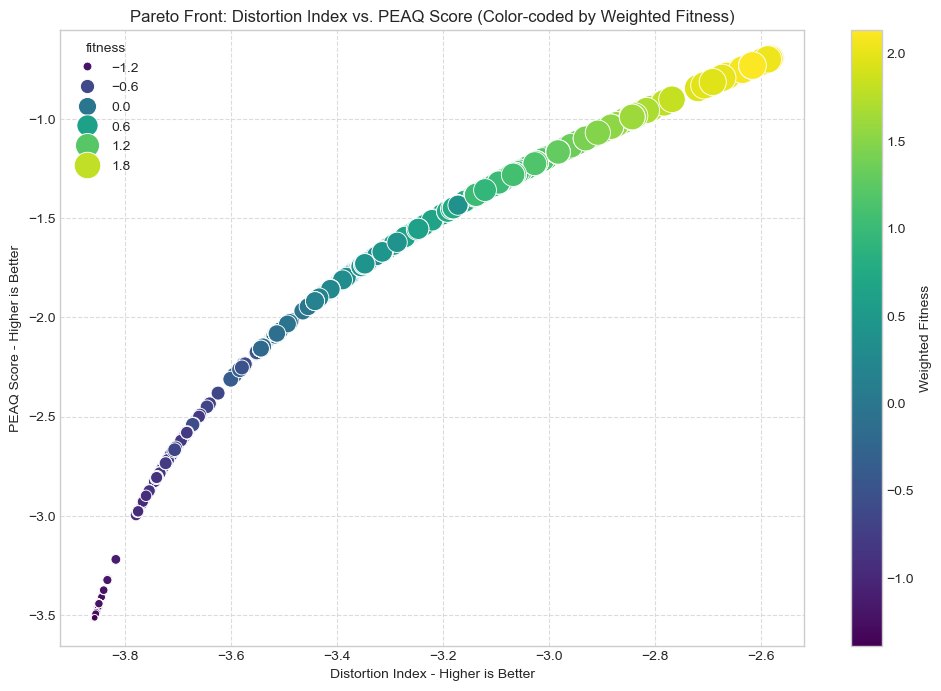

In [292]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='peaq_score',
    y='distortion_index',
    hue='fitness', # Color points by weighted fitness
    size='fitness', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='viridis', # Choose a colormap
    #legend='full'
)

# Adjust y-axis if PEAQ score's interpretation implies higher is better
# PEAQ scores are typically negative, closer to 0 or positive is better
# So, no inversion needed, higher up on the y-axis is better.

plt.title('Pareto Front: Distortion Index vs. PEAQ Score (Color-coded by Weighted Fitness)')
plt.xlabel('Distortion Index - Higher is Better')
plt.ylabel('PEAQ Score - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a color bar
norm = plt.Normalize(df['fitness'].min(), df['fitness'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('Weighted Fitness')

plt.show()

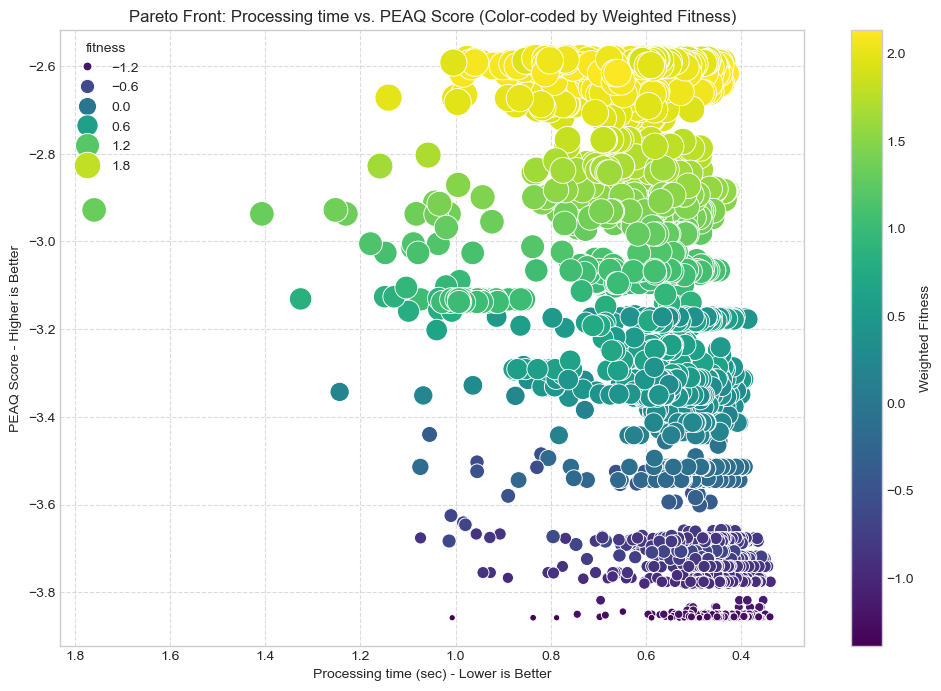

In [293]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='processing_time',
    y='peaq_score',
    hue='fitness', # Color points by weighted fitness
    size='fitness', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='viridis', # Choose a colormap
    #legend='full'
)

# Reverse x-axis if minimizing file_size makes lower values better
plt.gca().invert_xaxis() # Assuming lower file_size is better

plt.title('Pareto Front: Processing time vs. PEAQ Score (Color-coded by Weighted Fitness)')
plt.xlabel('Processing time (sec) - Lower is Better')
plt.ylabel('PEAQ Score - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a color bar
norm = plt.Normalize(df['fitness'].min(), df['fitness'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('Weighted Fitness')

plt.show()

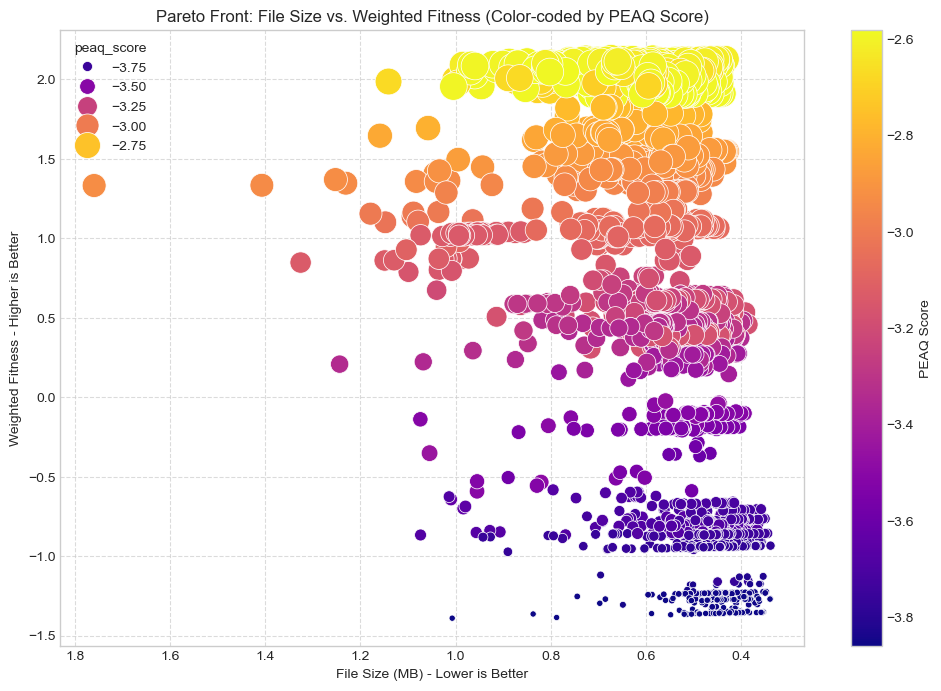

In [294]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='processing_time',
    y='fitness',
    hue='peaq_score', # Color points by weighted fitness
    size='peaq_score', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='plasma', # Choose a colormap
    #legend='full'
)

# Reverse x-axis if minimizing file_size makes lower values better
plt.gca().invert_xaxis() # Assuming lower file_size is better

# Adjust y-axis if PEAQ score's interpretation implies higher is better
# PEAQ scores are typically negative, closer to 0 or positive is better
# So, no inversion needed, higher up on the y-axis is better.

plt.title('Pareto Front: File Size vs. Weighted Fitness (Color-coded by PEAQ Score)')
plt.xlabel('File Size (MB) - Lower is Better')
plt.ylabel('Weighted Fitness - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

norm = plt.Normalize(df['peaq_score'].min(), df['peaq_score'].max())
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('PEAQ Score')

plt.show()

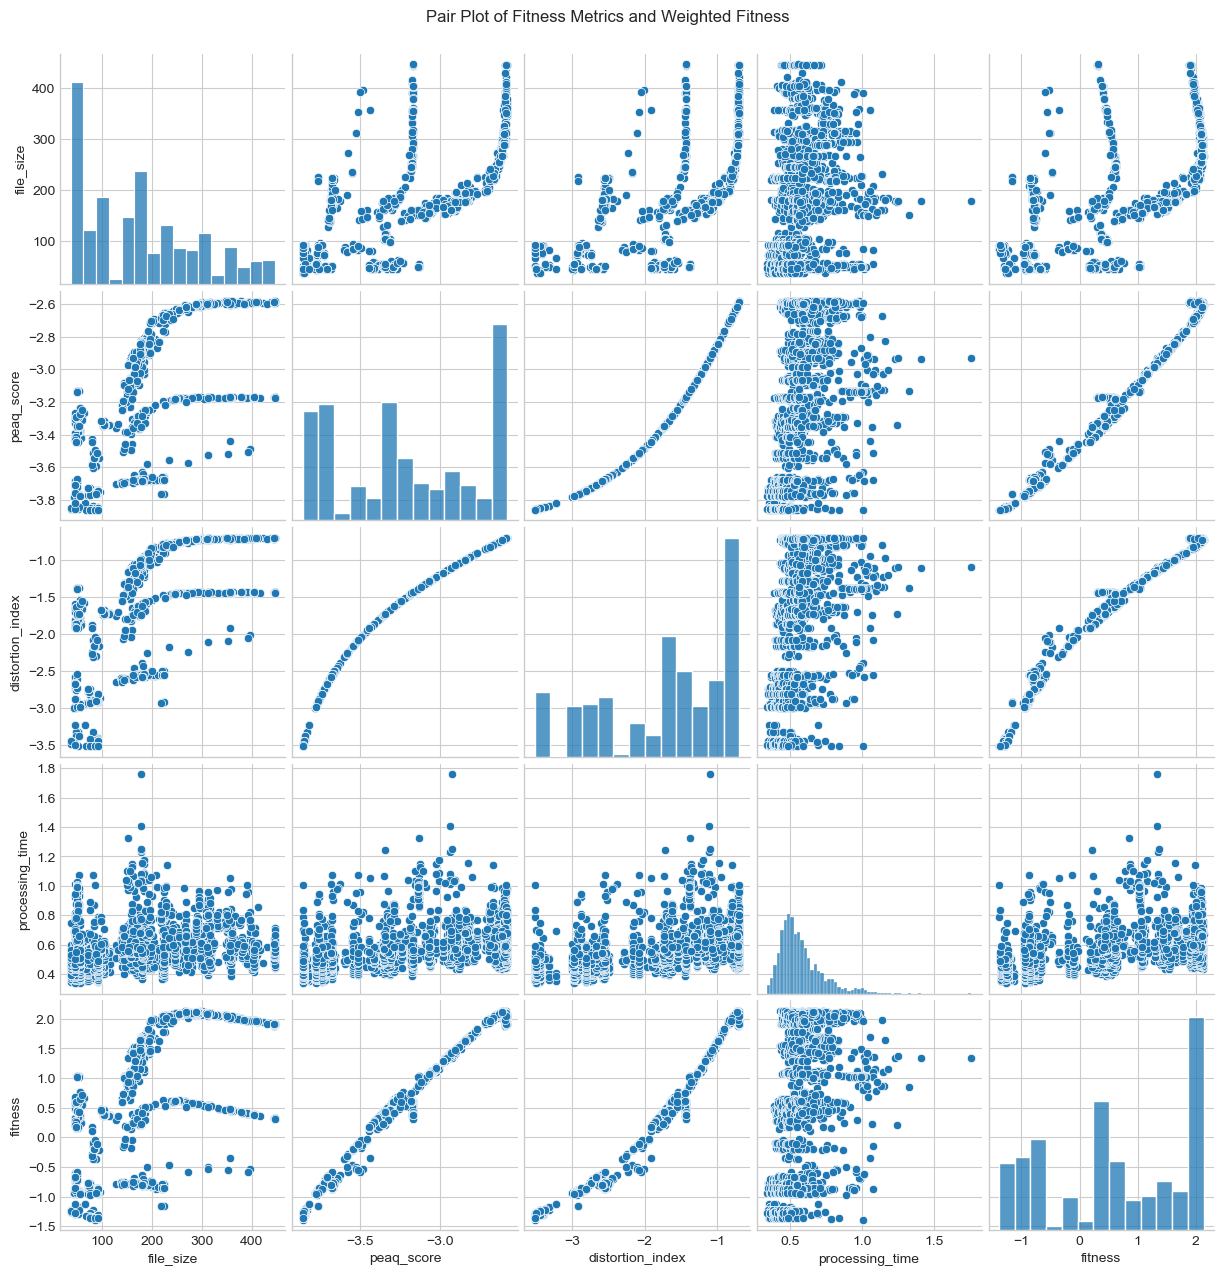

In [295]:
# Select only the numerical fitness columns and fitness for the pair plot
fitness_cols = ['file_size', 'peaq_score', 'distortion_index', 'processing_time', 'fitness']
sns.pairplot(df[fitness_cols])
plt.suptitle('Pair Plot of Fitness Metrics and Weighted Fitness', y=1.02) # Adjust title position
plt.show()

# Results

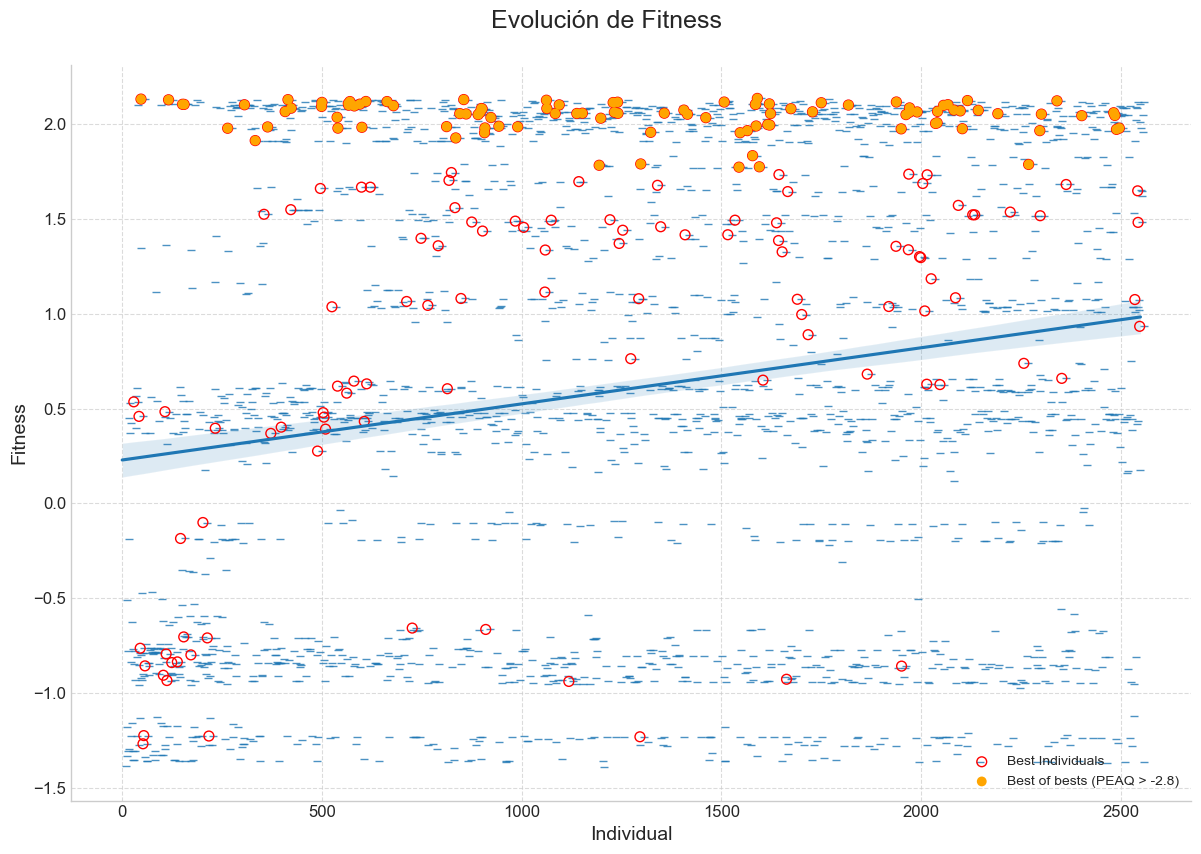

In [296]:
data = df
data = data.reset_index()

# Plot the lmplot
g = sns.lmplot(
    data=data,
    x='index',
    y="fitness",
    markers=True,
    height=8,
    aspect=1.5,
)

g.set_axis_labels("Individual", "Fitness", fontsize=14)
g.fig.suptitle("Evolución de Fitness", fontsize=18, y=1.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

if Finished: 
    # Overlay red circle markers for 'best' individuals
    best_points = data[data['best']]
    plt.scatter(
        best_points['index'],
        best_points['fitness'],
        facecolors='none',
        edgecolors='red',
        marker='o',
        s=50, # Increased size for better visibility
        label='Best Individuals'
    )

    # Overlay green circle markers for 'best' individuals with peaq_score > -3
    peaq_threshold = -2.8
    best_points_green = data[(data['best']) & (data['peaq_score'] > peaq_threshold)]
    plt.scatter(
        best_points_green['index'],
        best_points_green['fitness'],
        facecolors='orange',
        edgecolors='none',
        marker='o',
        s=50, # Increased size for better visibility
        label=f'Best of bests (PEAQ > {peaq_threshold})'
    )

plt.legend(loc='lower right') # Moved legend to avoid conflict with annotation

plt.show()

In [297]:
from scipy import stats

# Calculate the slope and intercept using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(data['index'], data['fitness'])

# Calcular el valor 'y' para len(df)
y_final = slope * len(df) + intercept

def improves(initial, final):
    if initial == 0: return '∞' #float('inf')
    improvement = abs(final/initial)
    if round(improvement) < 1:
        return f'{round(improvement,2)}x'
    else:
        return f'{round(improvement)}x'

print(f"Pendiente de la curva de tendencia: {slope:.4f}")
print(f"Coeficiente de correlación (R): {r_value:.4f}\n")
print(f"Fitness medio incial: {intercept:.4f}")
print(f"Fitness medio final: {y_final:.4f}")
print(f'Representa una mejora de {improves(intercept,y_final)}')

Pendiente de la curva de tendencia: 0.0003
Coeficiente de correlación (R): 0.1867

Fitness medio incial: 0.2288
Fitness medio final: 0.9827
Representa una mejora de 4x


---

In [298]:
if not Finished:
    raise RuntimeError("Execution stopped: Results file not found or process not finished.")

In [299]:
data = df_res
data = data.reset_index()

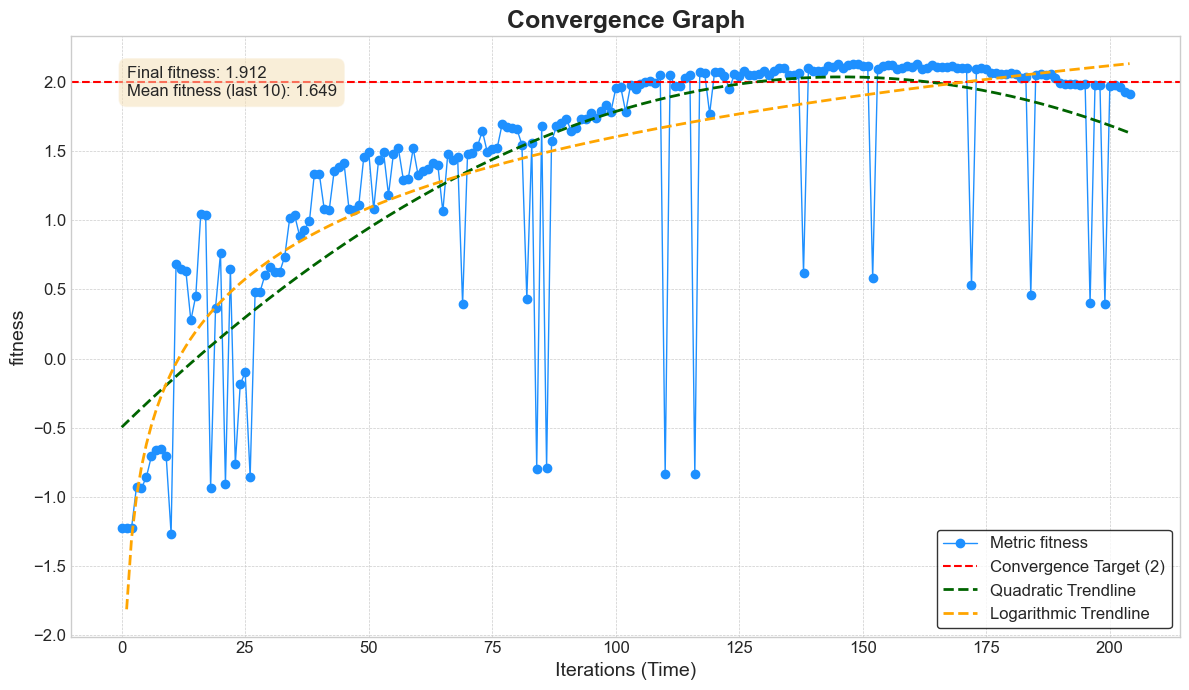

In [300]:
# --- Create the Convergence Graph ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the convergence data
ax.plot(data['index'], data['fitness'], label='Metric fitness', color='dodgerblue', marker='o', linestyle='-', linewidth=1, alpha=1)

# Add a horizontal line for the convergence target
ax.axhline(y=convergence_target, color='r', linestyle='--', label=f'Convergence Target ({convergence_target})')

# # Calculate the 10-value moving average
# data['moving_average_10'] = data['fitness'].rolling(window=10).mean()
# # Calculate the 50-value moving average
# data['moving_average_50'] = data['fitness'].rolling(window=50).mean()
# # Calculate the 100-value moving average
# data['moving_average_200'] = data['fitness'].rolling(window=200).mean()

# Plot moving averages
# ax.plot(data['index'], data['moving_average_10'], label='10-Value Moving Average', color='violet', linewidth=2, alpha=0.5)
# ax.plot(data['index'], data['moving_average_50'], label='50-Value Moving Average', color='orange', linewidth=2)
# ax.plot(data['index'], data['moving_average_200'], label='200-Value Moving Average', color='blue', linewidth=2)

# --- Add Quadratic Trendline ---
# Fit a 2nd degree polynomial (quadratic) to the data
# x = data['index']
# y = data['fitness']
# Using only finite values to avoid issues with NaN from rolling averages or other data issues
valid_indices = data['index'].values
valid_fitness = data['fitness'].values

# Fit a 2nd degree polynomial (quadratic) to the data
coefficients = np.polyfit(valid_indices, valid_fitness, 2) # 2 for quadratic
polynomial = np.poly1d(coefficients)

# Generate y-values for the trendline using the fitted polynomial
trendline_y = polynomial(valid_indices)

# Plot the quadratic trendline
ax.plot(valid_indices, trendline_y, label='Quadratic Trendline', color='darkgreen', linestyle='--', linewidth=2)

# --- Add Logarithmic Trendline ---
# Ensure only finite and positive values are used for logarithmic fitting
# This filters out any index values that are <= 0, which would cause issues with np.log()
positive_indices_mask = data['index'] > 0
filtered_indices = data['index'][positive_indices_mask].values
filtered_fitness = data['fitness'][positive_indices_mask].values

# Only attempt to fit if there are enough data points after filtering
if len(filtered_indices) > 1:
    # Fit a linear polynomial to log(x) and y to get coefficients for a logarithmic trendline
    # A logarithmic trendline is of the form y = A * log(x) + B
    # We perform a linear fit on y vs. log(x)
    coefficients_log = np.polyfit(np.log(filtered_indices), filtered_fitness, 1) # 1 for linear fit
    poly_log = np.poly1d(coefficients_log)

    # Generate y-values for the logarithmic trendline using the fitted polynomial
    # Apply the polynomial to log(filtered_indices)
    trendline_y_log = poly_log(np.log(filtered_indices))

    # Plot the logarithmic trendline
    ax.plot(filtered_indices, trendline_y_log, label='Logarithmic Trendline', color='orange', linestyle='--', linewidth=2)

    # Format the logarithmic equation for display: y = A * ln(x) + B
    log_eq_str = f"{coefficients_log[0]:.3f} \\ln(x) + {coefficients_log[1]:.3f}"
else:
    log_eq_str = "Not enough positive data points for log trendline."
    print("Warning: Not enough positive data points to fit a logarithmic trendline.")

# --- Customize the plot ---
ax.set_title('Convergence Graph', fontsize=18, fontweight='bold')
ax.set_xlabel('Iterations (Time)', fontsize=14)
ax.set_ylabel('fitness', fontsize=14)
ax.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black') 
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a text box with some stats
stats_text = (f"Final fitness: {data['fitness'].iloc[-1]:.3f}\n"
            f"Mean fitness (last 10): {data['fitness'].tail(10).mean():.3f}")
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


# Show the plot
plt.tight_layout()
plt.show()


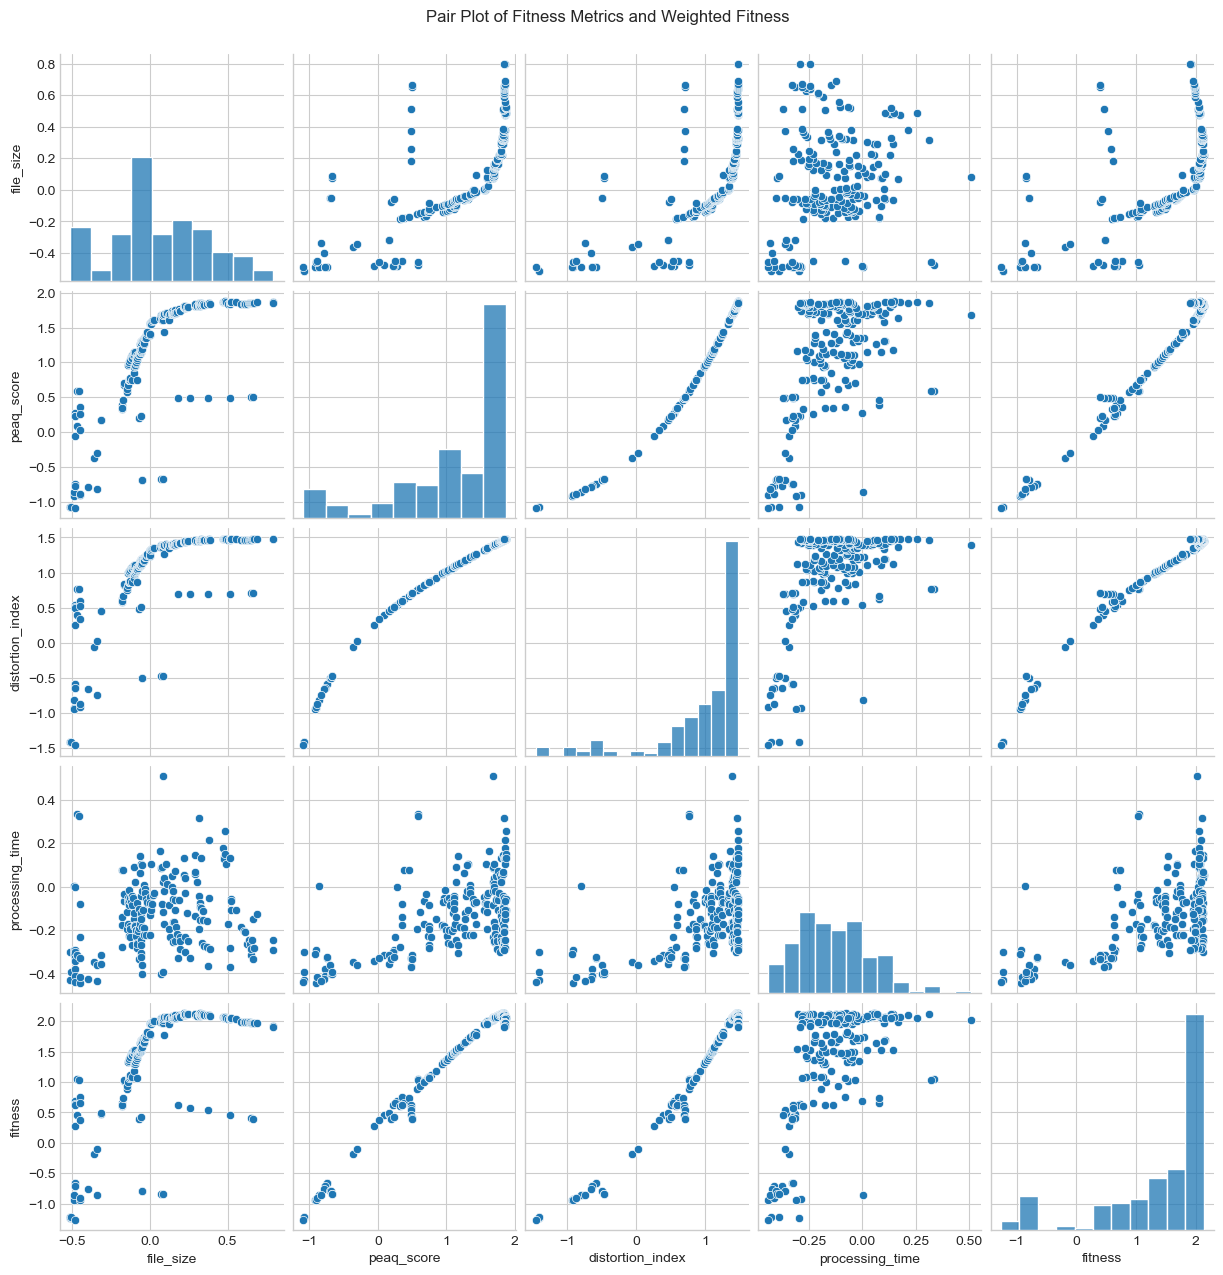

In [301]:
# Select only the numerical fitness columns and fitness for the pair plot
fitness_cols = ['file_size', 'peaq_score', 'distortion_index', 'processing_time', 'fitness']
sns.pairplot(data[fitness_cols])
plt.suptitle('Pair Plot of Fitness Metrics and Weighted Fitness', y=1.02) # Adjust title position
plt.show()

peaq_score


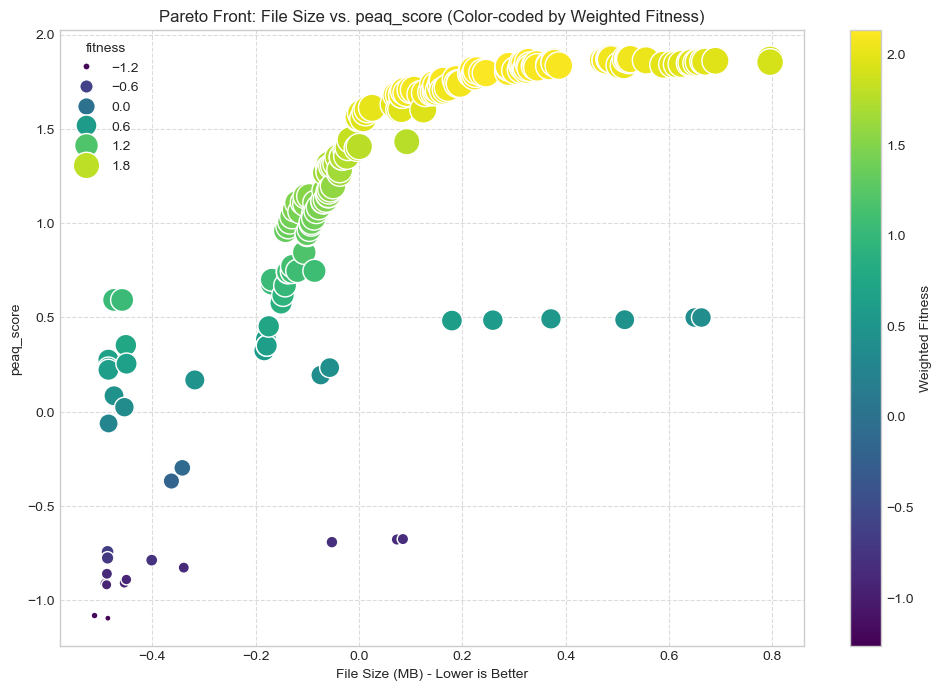

distortion_index


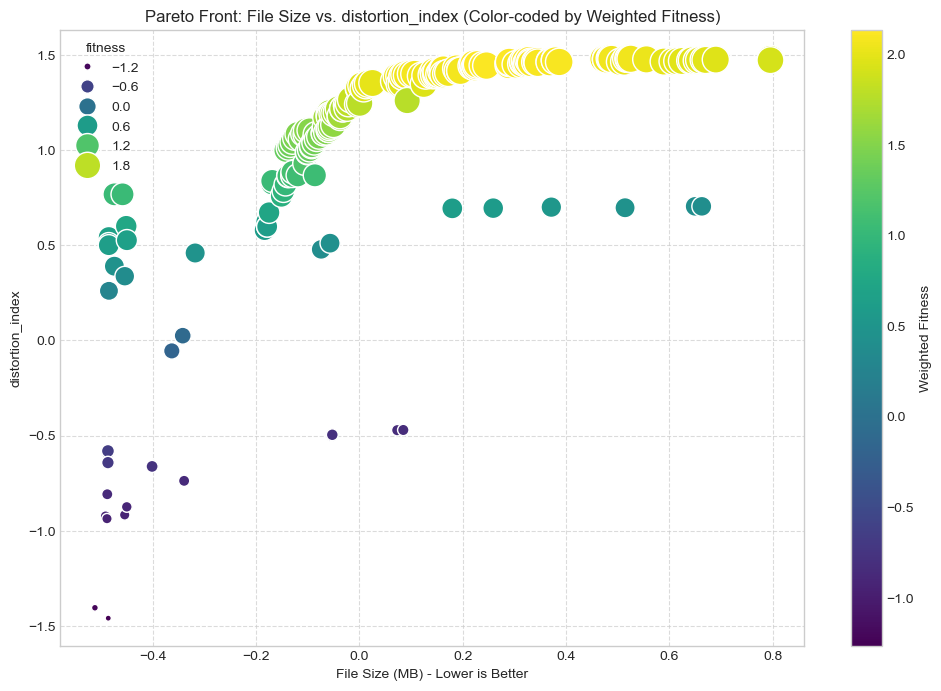

processing_time


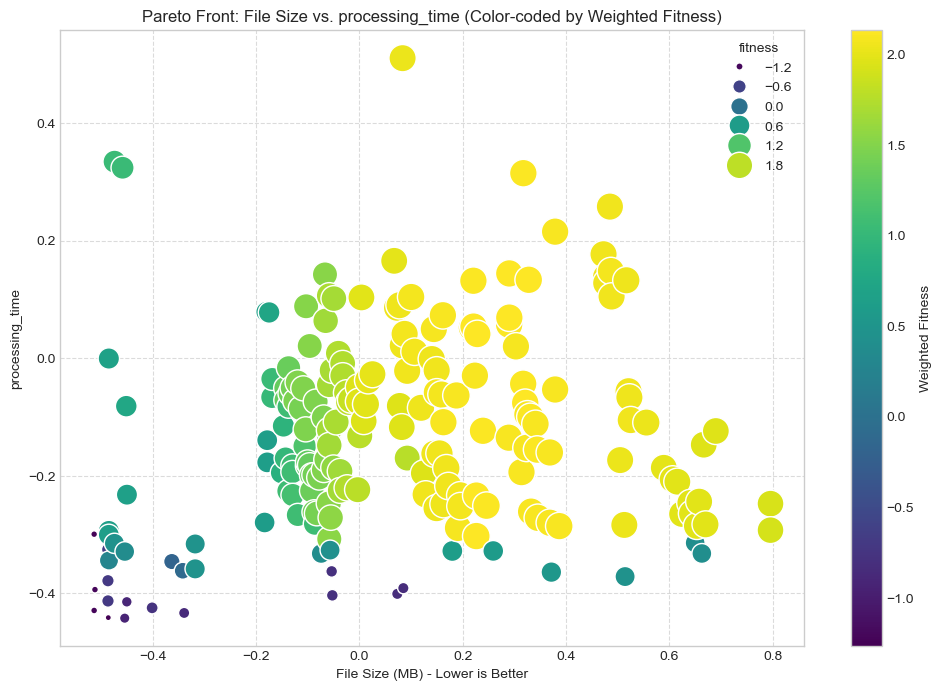

In [302]:
for feature in ['peaq_score','distortion_index','processing_time']:
    print(feature)
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=data,
        x='file_size', 
        y=feature,
        hue='fitness', # Color points by weighted fitness
        size='fitness', # Size points by weighted fitness (optional, can be removed)
        sizes=(20, 400), # Adjust size range
        palette='viridis', # Choose a colormap
        #legend='full'
    )

    # Reverse x-axis if minimizing file_size makes lower values better
    #plt.gca().invert_xaxis() # Assuming lower file_size is better

    plt.title(f'Pareto Front: File Size vs. {feature} (Color-coded by Weighted Fitness)')
    plt.xlabel('File Size (MB) - Lower is Better')
    plt.ylabel(f'{feature}')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a color bar
    norm = plt.Normalize(data['fitness'].min(), data['fitness'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=scatter.axes)
    cbar.set_label('Weighted Fitness')

    plt.show()

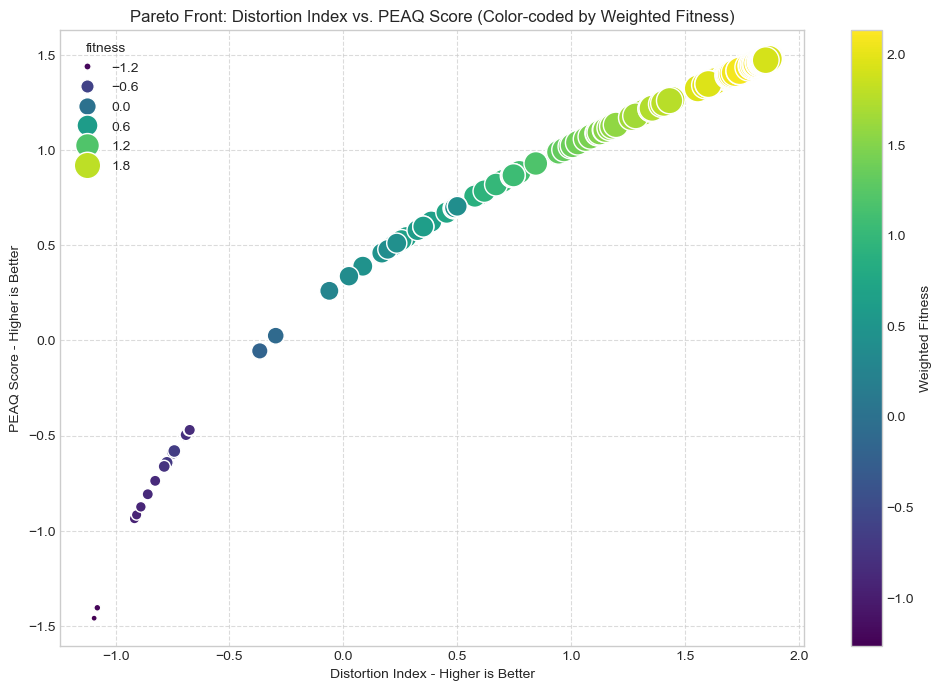

In [303]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='peaq_score',
    y='distortion_index',
    hue='fitness', # Color points by weighted fitness
    size='fitness', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='viridis', # Choose a colormap
    #legend='full'
)

# Adjust y-axis if PEAQ score's interpretation implies higher is better
# PEAQ scores are typically negative, closer to 0 or positive is better
# So, no inversion needed, higher up on the y-axis is better.

plt.title('Pareto Front: Distortion Index vs. PEAQ Score (Color-coded by Weighted Fitness)')
plt.xlabel('Distortion Index - Higher is Better')
plt.ylabel('PEAQ Score - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a color bar
norm = plt.Normalize(data['fitness'].min(), data['fitness'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('Weighted Fitness')

plt.show()

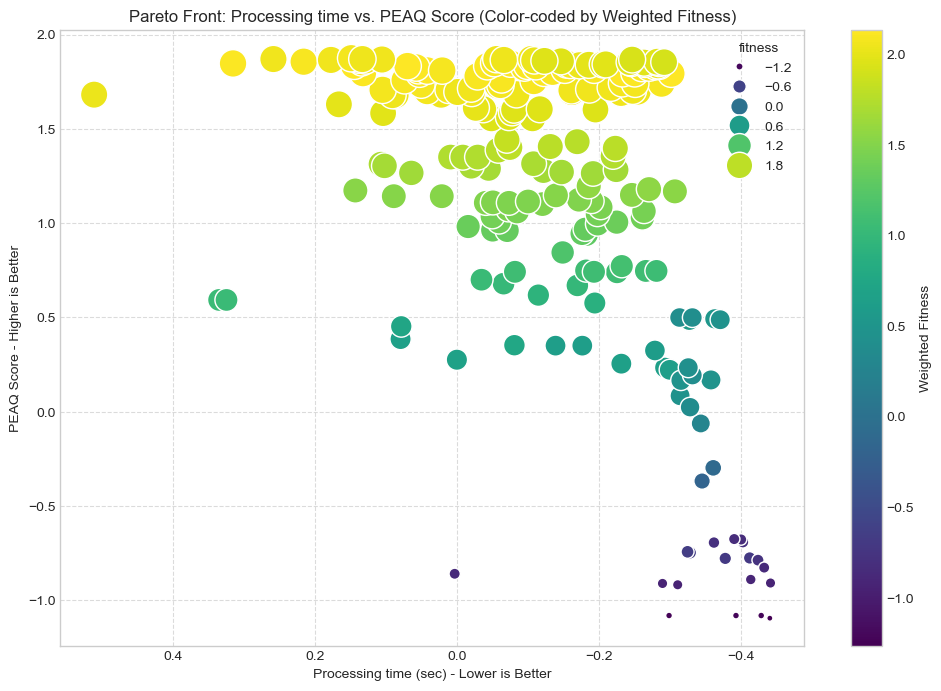

In [304]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='processing_time',
    y='peaq_score',
    hue='fitness', # Color points by weighted fitness
    size='fitness', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='viridis', # Choose a colormap
    #legend='full'
)

# Reverse x-axis if minimizing file_size makes lower values better
plt.gca().invert_xaxis() # Assuming lower file_size is better


plt.title('Pareto Front: Processing time vs. PEAQ Score (Color-coded by Weighted Fitness)')
plt.xlabel('Processing time (sec) - Lower is Better')
plt.ylabel('PEAQ Score - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a color bar
norm = plt.Normalize(data['fitness'].min(), data['fitness'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('Weighted Fitness')

plt.show()

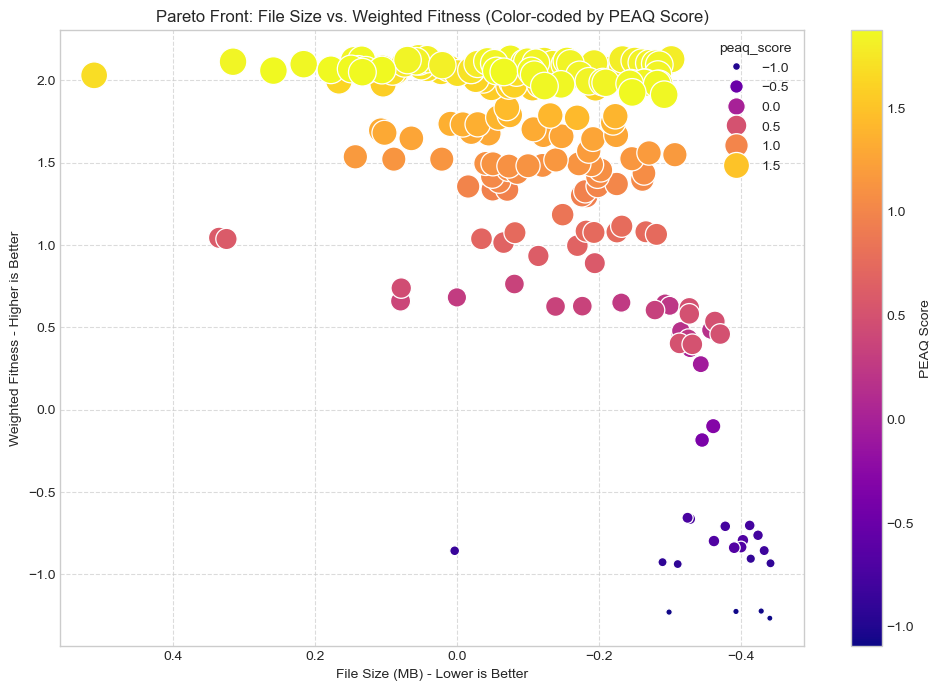

In [305]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='processing_time',
    y='fitness',
    hue='peaq_score', # Color points by weighted fitness
    size='peaq_score', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='plasma', # Choose a colormap
    #legend='full'
)

# Reverse x-axis if minimizing file_size makes lower values better
plt.gca().invert_xaxis() # Assuming lower file_size is better

# Adjust y-axis if PEAQ score's interpretation implies higher is better
# PEAQ scores are typically negative, closer to 0 or positive is better
# So, no inversion needed, higher up on the y-axis is better.

plt.title('Pareto Front: File Size vs. Weighted Fitness (Color-coded by PEAQ Score)')
plt.xlabel('File Size (MB) - Lower is Better')
plt.ylabel('Weighted Fitness - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

norm = plt.Normalize(data['peaq_score'].min(), data['peaq_score'].max())
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('PEAQ Score')

plt.show()

In [306]:
# import matplotlib.pyplot as plt
# from numpy.random import random
# from mpl_toolkits.mplot3d import Axes3D

# colors=['b', 'c', 'y', 'm', 'r']

# ax = plt.subplot(111, projection='3d')

# ax.plot(random(10), random(10), random(10), 'x', color=colors[0], label='Low Outlier')
# ax.plot(random(10), random(10), random(10), 'o', color=colors[0], label='LoLo')
# ax.plot(random(10), random(10), random(10), 'o', color=colors[1], label='Lo')
# ax.plot(random(10), random(10), random(10), 'o', color=colors[2], label='Average')
# ax.plot(random(10), random(10), random(10), 'o', color=colors[3], label='Hi')
# ax.plot(random(10), random(10), random(10), 'o', color=colors[4], label='HiHi')
# ax.plot(random(10), random(10), random(10), 'x', color=colors[4], label='High Outlier')

# plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))

# plt.show()

# Best params analysis

In [307]:
threshold = 1.5 # Set threshold for optimal results filtering
df_opt = df[df['fitness'] > threshold]
df_opt

params   file_size  \
30    {'ar': '44100', 'sample_fmt': 's32p', 'compres...  312.220703   
47    {'ar': '44100', 'sample_fmt': 'fltp', 'compres...  297.255859   
88    {'ar': '44100', 'sample_fmt': 's32p', 'compres...  312.220703   
104   {'ar': '44100', 'sample_fmt': 's32p', 'compres...  312.220703   
116   {'ar': '44100', 'sample_fmt': 's32p', 'compres...  267.627930   
...                                                 ...         ...   
2542  {'ar': '44100', 'sample_fmt': 's16p', 'compres...  176.248047   
2544  {'ar': '44100', 'sample_fmt': 'fltp', 'compres...  193.207031   
2545  {'ar': '44100', 'sample_fmt': 'fltp', 'compres...  241.137695   
2546  {'ar': '44100', 'sample_fmt': 's32p', 'compres...  351.261719   
2549  {'ar': '44100', 'sample_fmt': 'fltp', 'compres...  267.627930   

      peaq_score  distortion_index  processing_time   fitness   best  
30        -2.597            -0.712         0.538902  2.101675  False  
47        -2.594            -0.708         0.585550  2.130358   True  
88        -2.597            -0.712         0.562868  2.099904  False  
104       -2.597            -0.712         0.530599  2.102289  False  
116       -2.616            -0.732         0.478846  2.126692   True  
...          ...               ...              ...       ...    ...  
2542      -2.843            -0.991         0.679965  1.647038   True  
2544      -2.843            -0.991         0.676381  1.620242  False  
2545      -2.691            -0.815         0.594323  1.959497  False  
2546      -2.587            -0.701         0.801827  2.046715  False  
2549      -2.616            -0.732         0.659126  2.113366  False  

[810 rows x 7 columns]

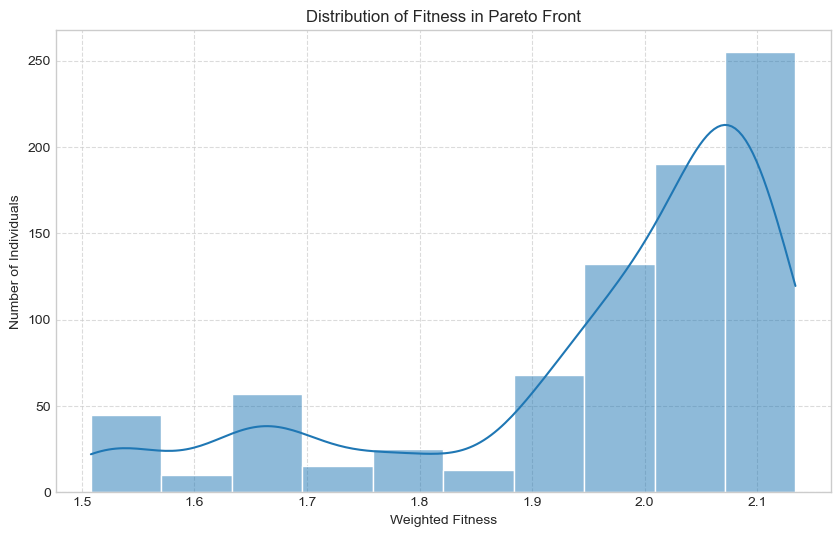

In [308]:
plt.figure(figsize=(10, 6))
sns.histplot(df_opt['fitness'], kde=True, bins=10)
plt.title('Distribution of Fitness in Pareto Front')
plt.xlabel('Weighted Fitness')
plt.ylabel('Number of Individuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

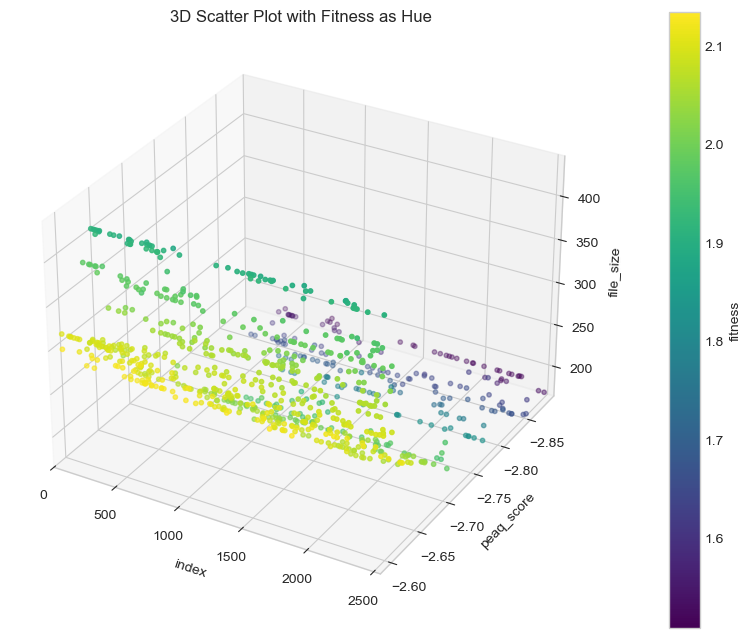

In [309]:
num_points = len(df)

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with 'fitness' determining the color
# 'c' parameter is used to map numerical values to colors, and 'cmap' specifies the colormap
scatter = ax.scatter(
    df_opt.index,         # X-axis
    df_opt['peaq_score'], # Y-axis
    df_opt['file_size'],  # Z-axis (using df_optFrame index as requested)
    c=df_opt['fitness'],  # Color based on 'fitness' values
    cmap='viridis',   # Colormap (you can try others like 'plasma', 'magma', 'cividis')
    s=10              # Size of the scatter points
)

# Set labels for each axis
ax.set_xlabel('index')
ax.set_ylabel('peaq_score')
ax.set_zlabel('file_size')

# Set the limits for each axis
ax.set_xlim(0, num_points) # Z-axis limit set to the number of df_opt points
ax.set_ylim(df_opt['peaq_score'].max(), df_opt['peaq_score'].min())
ax.set_zlim(df_opt['file_size'].min(), df_opt['file_size'].max())

# Set the title of the plot
ax.set_title('3D Scatter Plot with Fitness as Hue')

# Add a color bar to explain the 'fitness' color mapping
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('fitness')

# Display the plot
plt.show()

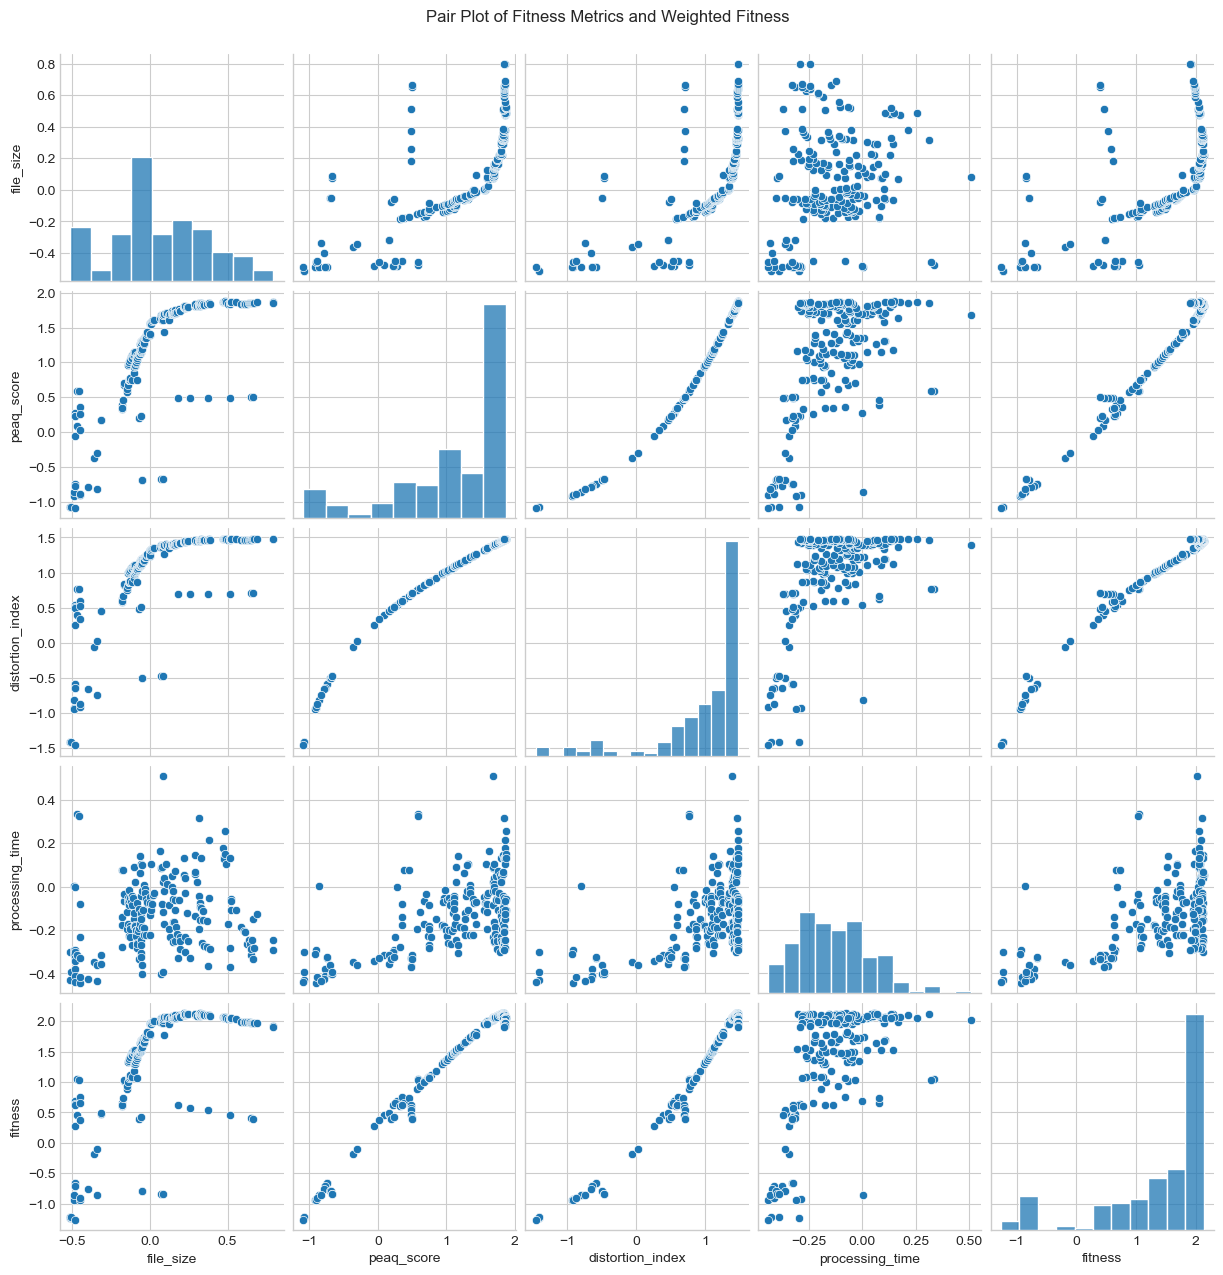

In [310]:
# Select only the numerical fitness columns and fitness for the pair plot
fitness_cols = ['file_size', 'peaq_score', 'distortion_index', 'processing_time', 'fitness']
sns.pairplot(data[fitness_cols])
plt.suptitle('Pair Plot of Fitness Metrics and Weighted Fitness', y=1.02) # Adjust title position
plt.show()

In [311]:
data = df_opt.reset_index()

peaq_score


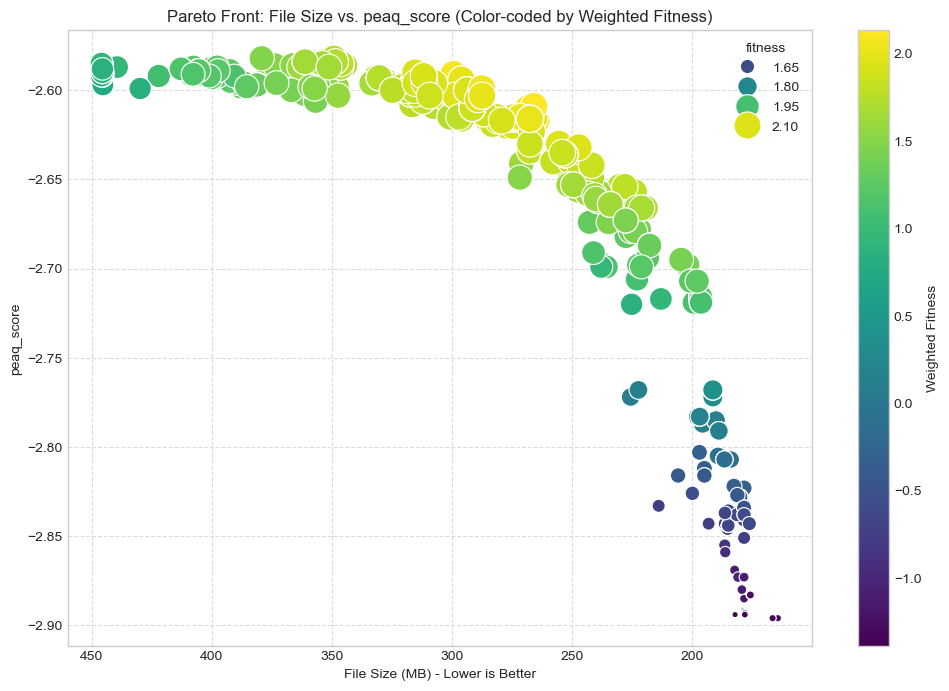

distortion_index


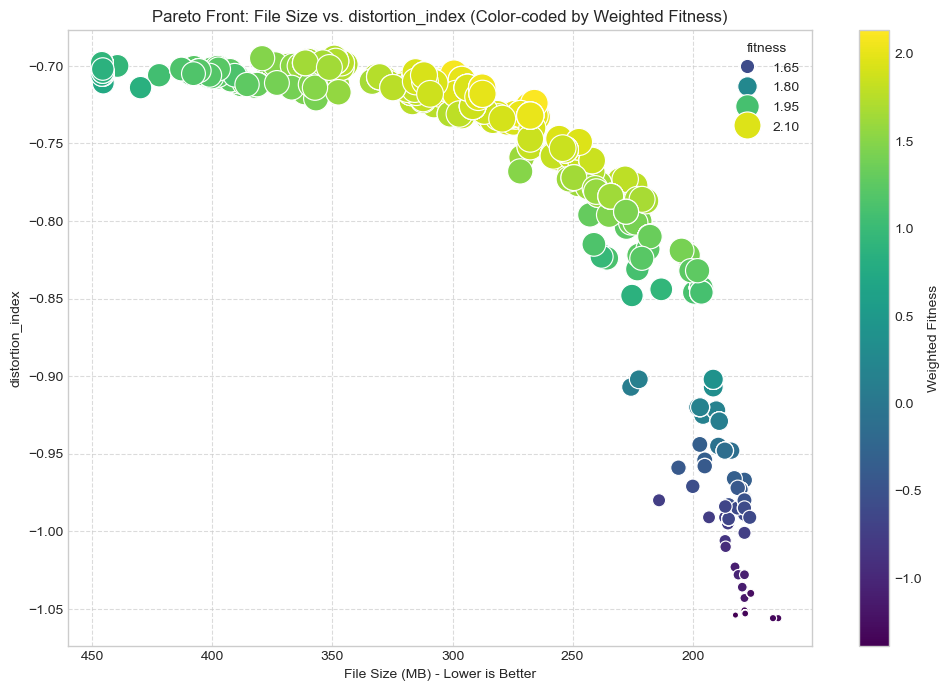

processing_time


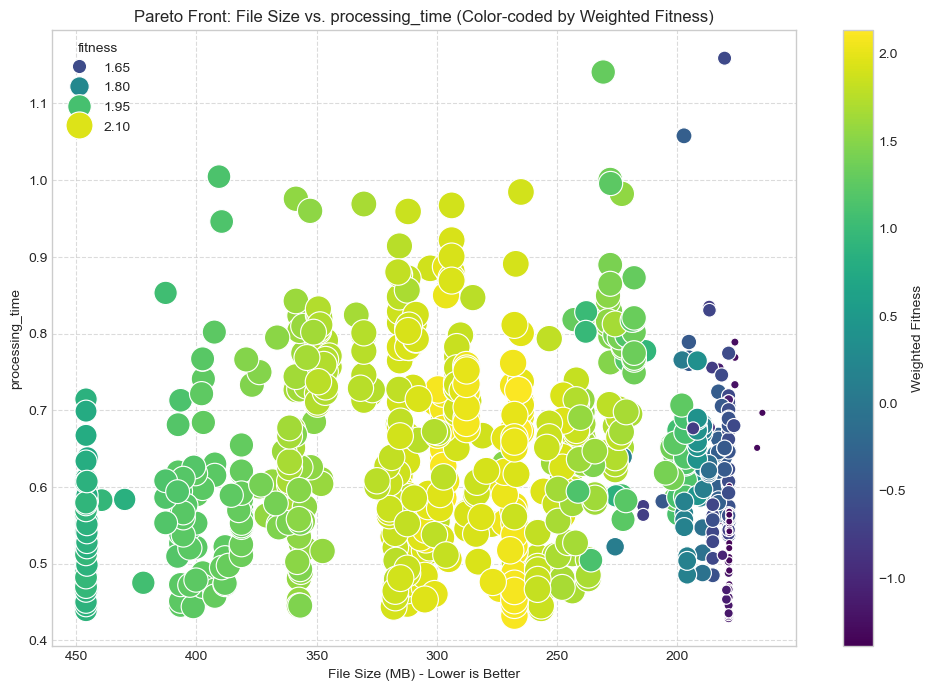

In [312]:
for feature in ['peaq_score','distortion_index','processing_time']:
    print(feature)
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=data,
        x='file_size', 
        y=feature,
        hue='fitness', # Color points by weighted fitness
        size='fitness', # Size points by weighted fitness (optional, can be removed)
        sizes=(20, 400), # Adjust size range
        palette='viridis', # Choose a colormap
        #legend='full'
    )

    # Reverse x-axis if minimizing file_size makes lower values better
    plt.gca().invert_xaxis() # Assuming lower file_size is better

    plt.title(f'Pareto Front: File Size vs. {feature} (Color-coded by Weighted Fitness)')
    plt.xlabel('File Size (MB) - Lower is Better')
    plt.ylabel(f'{feature}')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a color bar
    norm = plt.Normalize(df['fitness'].min(), df['fitness'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=scatter.axes)
    cbar.set_label('Weighted Fitness')

    plt.show()

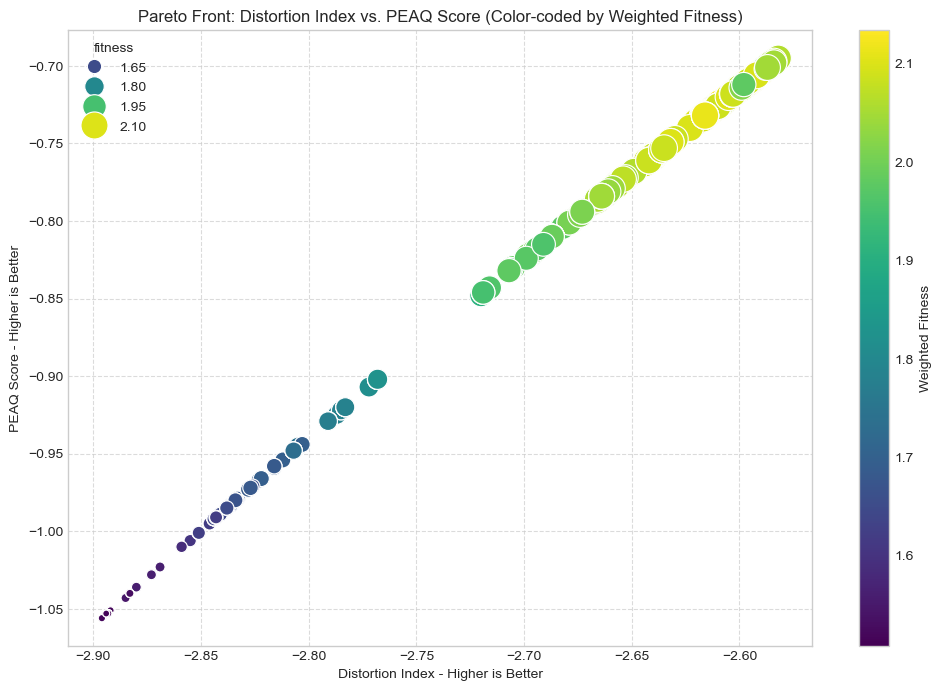

In [313]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='peaq_score',
    y='distortion_index',
    hue='fitness', # Color points by weighted fitness
    size='fitness', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='viridis', # Choose a colormap
    #legend='full'
)

# Adjust y-axis if PEAQ score's interpretation implies higher is better
# PEAQ scores are typically negative, closer to 0 or positive is better
# So, no inversion needed, higher up on the y-axis is better.

plt.title('Pareto Front: Distortion Index vs. PEAQ Score (Color-coded by Weighted Fitness)')
plt.xlabel('Distortion Index - Higher is Better')
plt.ylabel('PEAQ Score - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a color bar
norm = plt.Normalize(data['fitness'].min(), data['fitness'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('Weighted Fitness')

plt.show()

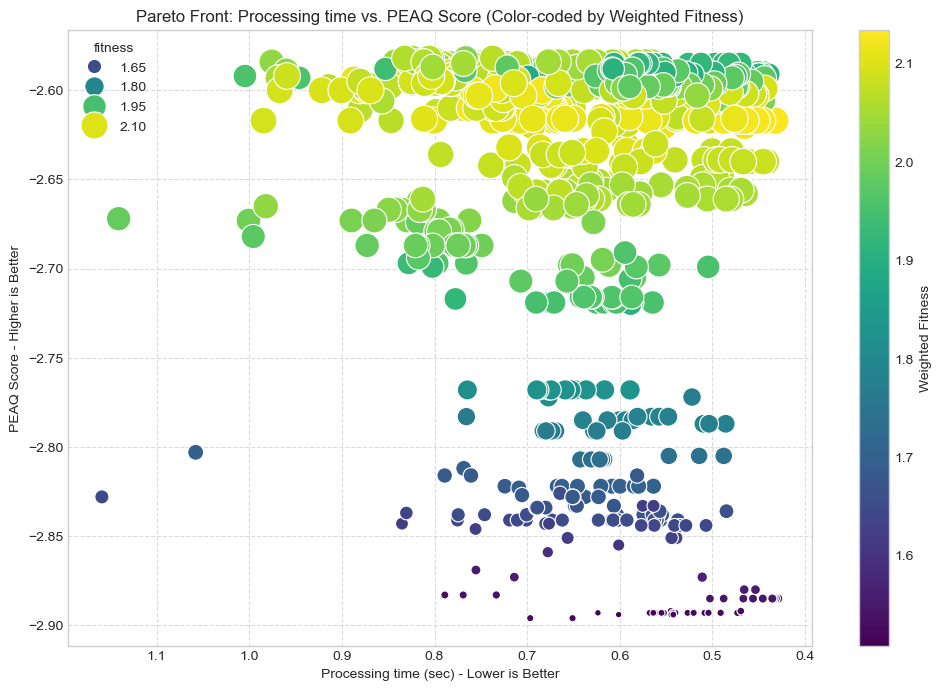

In [314]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='processing_time',
    y='peaq_score',
    hue='fitness', # Color points by weighted fitness
    size='fitness', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='viridis', # Choose a colormap
    #legend='full'
)

# Reverse x-axis if minimizing file_size makes lower values better
plt.gca().invert_xaxis() # Assuming lower file_size is better

plt.title('Pareto Front: Processing time vs. PEAQ Score (Color-coded by Weighted Fitness)')
plt.xlabel('Processing time (sec) - Lower is Better')
plt.ylabel('PEAQ Score - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a color bar
norm = plt.Normalize(data['fitness'].min(), data['fitness'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('Weighted Fitness')

plt.show()

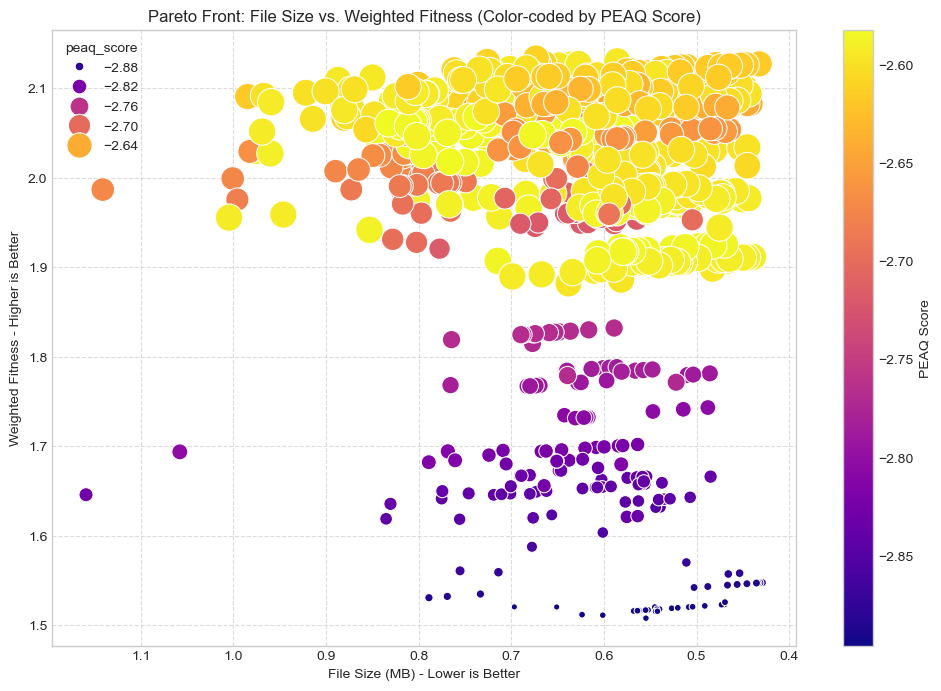

In [315]:
# ['file_size', 'peaq_score','distortion_index','processing_time']
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='processing_time',
    y='fitness',
    hue='peaq_score', # Color points by weighted fitness
    size='peaq_score', # Size points by weighted fitness (optional, can be removed)
    sizes=(20, 400), # Adjust size range
    palette='plasma', # Choose a colormap
    #legend='full'
)

# Reverse x-axis if minimizing file_size makes lower values better
plt.gca().invert_xaxis() # Assuming lower file_size is better

# Adjust y-axis if PEAQ score's interpretation implies higher is better
# PEAQ scores are typically negative, closer to 0 or positive is better
# So, no inversion needed, higher up on the y-axis is better.

plt.title('Pareto Front: File Size vs. Weighted Fitness (Color-coded by PEAQ Score)')
plt.xlabel('File Size (MB) - Lower is Better')
plt.ylabel('Weighted Fitness - Higher is Better')
plt.grid(True, linestyle='--', alpha=0.7)

norm = plt.Normalize(data['peaq_score'].min(), data['peaq_score'].max())
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('PEAQ Score')

plt.show()